# Project : Taxi fare Prediction 

## Group members : 
***Aashir Ali (20SW023)***

***Ghansham Soomarani (20SW081)***

***Shehzad Haider (20SW067)***

## Dataset Description:

**Title:** Transportation Cost Prediction Dataset

**Source:** https://www.kaggle.com/datasets/raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting

**Description:** This dataset contains information related to transportation costs for a taxi or ridesharing service. It is designed for the purpose of predicting the total fare of individual taxi rides based on various input features.

### Features:

1. **trip_duration (Numeric):** The duration of the taxi ride in minutes. This feature represents the time elapsed during the ride.

2. **distance_traveled (Numeric):** The distance traveled during the taxi ride, typically measured in miles or kilometers. It indicates the length of the journey.

3. **num_of_passengers (Numeric):** The number of passengers in the taxi during the ride. This feature may affect the fare, as larger groups may require larger vehicles.

4. **fare (Numeric):** The base fare or initial cost of the taxi ride before additional charges or fees. This feature represents the starting cost of the ride.

5. **tip (Numeric):** The amount of tip given by the passenger to the driver. Tips are typically added to the total fare as an additional charge.

6. **miscellaneous_fees (Numeric):** Any miscellaneous fees or additional charges incurred during the ride. These fees may include tolls, surcharges, or extra service fees.

7. **total_fare (Numeric - Target Variable):** The total cost of the taxi ride, including the base fare, tips, and miscellaneous fees. This is the variable that the model aims to predict.

8. **surge_applied (Binary - 0 or 1):** A binary indicator that specifies whether surge pricing was applied during the ride. Surge pricing typically results in higher fares during peak demand periods or special events. (0: Surge not applied, 1: Surge applied)

### Dataset Size:
The dataset consists of a certain number of rows, each representing an individual taxi ride, and eight columns corresponding to the features described above.

### Purpose:
The purpose of this dataset is to develop a predictive model that can accurately estimate the total fare of a taxi ride based on input features. Such models can be useful for both passengers and service providers to estimate transportation costs and make informed decisions.

### Data Collection:
The data may have been collected through various means, including ride-sharing platforms, taxi companies, or transportation authorities. It likely includes both historical and real-time ride data.

### Data Preprocessing:
Preprocessing steps such as cleaning, normalization, and feature engineering may have been applied to prepare the dataset for modeling.

### Target Variable:
The primary target variable is "total_fare," which represents the total cost of the ride. This is the variable that machine learning models aim to predict.

### Use Cases:
This dataset can be used for various purposes, including:

- Building regression models to predict taxi fares.
- Analyzing the impact of factors like distance, duration, and surge pricing on fares.
- Identifying trends in transportation costs based on different features.
- Developing pricing strategies for taxi or ridesharing services.


# Loading the Data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [44]:
df_1 = pd.read_csv(r"C:\Users\Aashir\Desktop\DSA project\taxi_fare\train.csv")

In [45]:
print(df_1.head())

   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  


In [46]:
len(df_1.columns)

8

In [47]:
df_2 = pd.read_csv(r"C:\Users\Aashir\Desktop\DSA project\taxi_fare\test.csv")
print(df_2.head())

   trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0         1076.0               4.18                1.0     0    0   
1          429.0               1.48                4.0     0    0   
2          856.0               4.15                1.0     0   24   
3          622.0               3.22                1.0     0   15   
4          507.0               3.98                1.0     0    0   

   miscellaneous_fees  total_fare  surge_applied  
0              13.500           0              0  
1              13.500           0              0  
2               6.000           0              0  
3               5.625           0              0  
4               2.250           0              0  


In [48]:
df_3 = pd.read_csv(r"C:\Users\Aashir\Desktop\DSA project\taxi_fare\submission.csv")
print(df_3.head())

   total_fare
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0


In [81]:
taxi_fare = pd.concat([df_1, df_2], axis=0)
taxi_fare.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


# Data Analysis

### Data Analysis Summary:

1. **Summary Statistics:**
   - The code calculates and displays summary statistics for the numerical features in the dataset. These statistics include measures such as mean, standard deviation, minimum, maximum, and quartiles, providing an overview of the central tendency and dispersion of the data.

2. **Missing Value Counts:**
   - It counts and reports the number of missing values for each numerical feature. This information helps identify data completeness and any potential gaps in the dataset.

3. **Correlation Matrix:**
   - The code computes and presents a correlation matrix for the numerical features. The correlation matrix reveals the degree of linear association between pairs of features, offering insights into relationships and dependencies within the dataset.

4. **Value Counts for 'surge_applied':**
   - The analysis includes the distribution of the 'surge_applied' feature. It provides a breakdown of the counts for the binary variable 'surge_applied,' shedding light on the prevalence of surge pricing in the dataset.

These data analysis tasks collectively aim to provide a comprehensive understanding of the dataset's numerical characteristics, data completeness, inter-feature relationships, and the distribution of a specific categorical feature.


In [50]:
print(taxi_fare.columns)

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')


In [51]:
taxi_fare.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.002596,0.000156,0.108455,0.030339,0.045751,0.099451,0.030917
distance_traveled,0.002596,1.000000,-0.000763,0.008181,0.005827,0.015052,0.007931,0.006066
num_of_passengers,0.000156,-0.000763,1.000000,0.010973,0.005990,0.009636,0.011483,0.005873
fare,0.108455,0.008181,0.010973,1.000000,0.218321,0.209494,0.975925,0.102467
tip,0.030339,0.005827,0.005990,0.218321,1.000000,0.330125,0.355759,0.244642
miscellaneous_fees,0.045751,0.015052,0.009636,0.209494,0.330125,1.000000,0.306912,0.713032
total_fare,0.099451,0.007931,0.011483,0.975925,0.355759,0.306912,1.000000,0.181377
surge_applied,0.030917,0.006066,0.005873,0.102467,0.244642,0.713032,0.181377,1.000000


In [52]:
len(taxi_fare.columns)

8

In [53]:
taxi_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299534 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       299534 non-null  float64
 1   distance_traveled   299534 non-null  float64
 2   num_of_passengers   299534 non-null  float64
 3   fare                299534 non-null  float64
 4   tip                 299534 non-null  int64  
 5   miscellaneous_fees  299534 non-null  float64
 6   total_fare          299534 non-null  float64
 7   surge_applied       299534 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 20.6 MB


In [54]:
taxi_fare.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000
mean,1165.680417,5.717167,1.290985,69.736136,13.030891,15.152971,89.453417,0.281050
std,4727.006306,321.516385,0.927814,84.933388,19.880049,12.590909,101.301805,0.449513
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,706.000000,3.200000,1.000000,56.250000,9.000000,9.750000,74.700000,0.000000
75%,1097.000000,5.730000,1.000000,93.750000,20.000000,26.450000,126.000000,1.000000
max,86395.000000,145517.600000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [55]:
taxi_fare.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [56]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(taxi_fare[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']].describe())



Summary statistics for numerical features:
       trip_duration  distance_traveled  num_of_passengers           fare  \
count  299534.000000      299534.000000      299534.000000  299534.000000   
mean     1165.680417           5.717167           1.290985      69.736136   
std      4727.006306         321.516385           0.927814      84.933388   
min         0.000000           0.020000           0.000000       0.000000   
25%       446.000000           1.950000           1.000000       0.000000   
50%       706.000000           3.200000           1.000000      56.250000   
75%      1097.000000           5.730000           1.000000      93.750000   
max     86395.000000      145517.600000           9.000000    4466.250000   

                 tip  miscellaneous_fees     total_fare  
count  299534.000000       299534.000000  299534.000000  
mean       13.030891           15.152971      89.453417  
std        19.880049           12.590909     101.301805  
min         0.000000          

In [57]:
len(taxi_fare)

299534

In [58]:
taxi_fare.shape

(299534, 8)

In [59]:
# Count of missing values for each feature
numerical_features = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']

# Calculate and display summary statistics
summary_stats = taxi_fare[numerical_features].describe()
missing_values_count = taxi_fare[numerical_features].isnull().sum()

# Display missing value counts
print("\nMissing Value Counts for Numerical Features:")
print(missing_values_count)



Missing Value Counts for Numerical Features:
trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
dtype: int64


In [60]:
taxi_fare.sum()

trip_duration         3.491609e+08
distance_traveled     1.712486e+06
num_of_passengers     3.866940e+05
fare                  2.088834e+07
tip                   3.903195e+06
miscellaneous_fees    4.538830e+06
total_fare            2.679434e+07
surge_applied         8.418400e+04
dtype: float64

In [61]:

# Correlation matrix for numerical features
correlation_matrix = taxi_fare[numerical_features].corr()

# Display correlation matrix
print("\nCorrelation Matrix for Numerical Features:")
print(correlation_matrix)

# Value counts for 'surge_applied'
surge_applied_counts = taxi_fare['surge_applied'].value_counts()


Correlation Matrix for Numerical Features:
                    trip_duration  distance_traveled  num_of_passengers  \
trip_duration            1.000000           0.002596           0.000156   
distance_traveled        0.002596           1.000000          -0.000763   
num_of_passengers        0.000156          -0.000763           1.000000   
fare                     0.108455           0.008181           0.010973   
tip                      0.030339           0.005827           0.005990   
miscellaneous_fees       0.045751           0.015052           0.009636   
total_fare               0.099451           0.007931           0.011483   

                        fare       tip  miscellaneous_fees  total_fare  
trip_duration       0.108455  0.030339            0.045751    0.099451  
distance_traveled   0.008181  0.005827            0.015052    0.007931  
num_of_passengers   0.010973  0.005990            0.009636    0.011483  
fare                1.000000  0.218321            0.209494    0

In [63]:
# Display value counts for 'surge_applied'
print("\nValue Counts for 'surge_applied':")
print(surge_applied_counts)



Value Counts for 'surge_applied':
0    215350
1     84184
Name: surge_applied, dtype: int64


# Extracting Input features and Target variable

In [64]:
# Extracting Inout features or independant variable
inputs = taxi_fare.drop(['total_fare'], axis=1)

In [65]:
print(inputs.head())

   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  surge_applied  
0               6.300              0  
1              13.200              0  
2              26.625              1  
3               9.750              0  
4              13.200              0  


In [66]:

print(len(inputs.columns))
print(inputs.shape)

7
(299534, 7)


In [67]:
# Extracting target variable or class label
target = taxi_fare['total_fare']

In [68]:
print(target.shape)


(299534,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=42)


In [70]:
X_train.shape

(209673, 7)

In [71]:

y_train.shape

(209673,)

In [72]:
X_test.shape

(89861, 7)

In [73]:
y_test.shape

(89861,)

# Data Visualtization

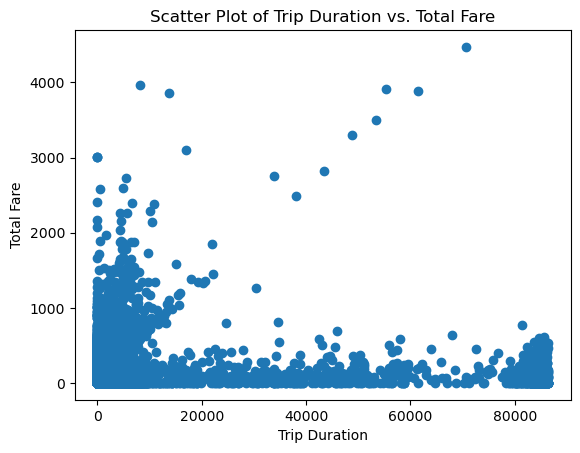

In [30]:
if len(inputs) == len(target):
    # Create a scatter plot
    plt.scatter(inputs['trip_duration'], target)
    plt.xlabel('Trip Duration')
    plt.ylabel('Total Fare')
    plt.title('Scatter Plot of Trip Duration vs. Total Fare')
    plt.show()
else:
    print("The number of data points in inputs and target is not the same.")

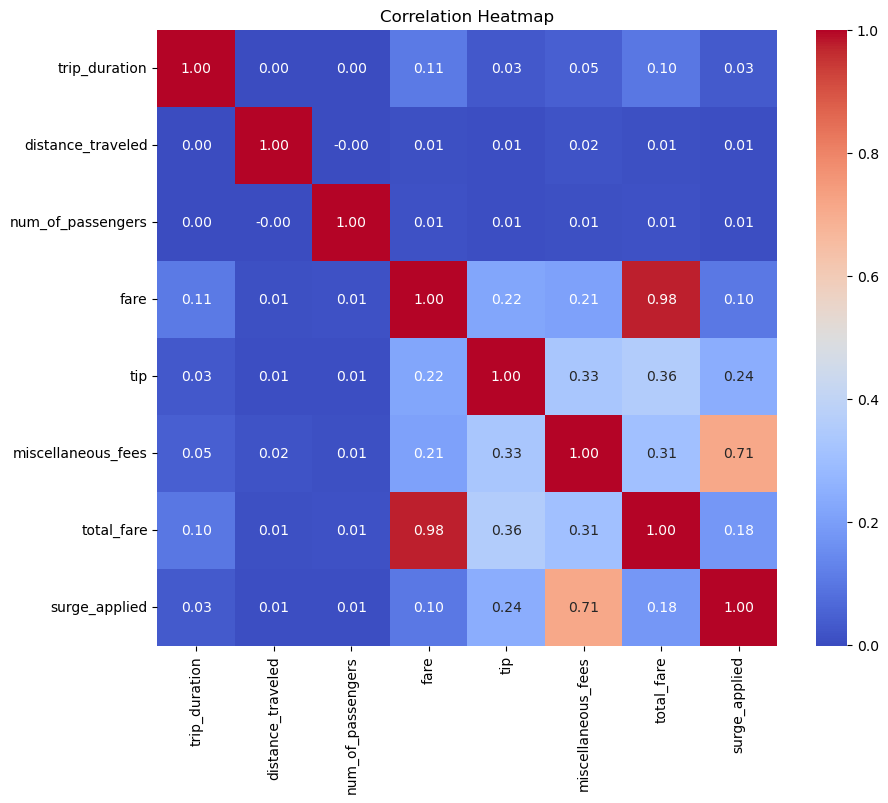

In [31]:
# Correlation heatmap to visualize feature correlations
correlation_matrix = taxi_fare.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

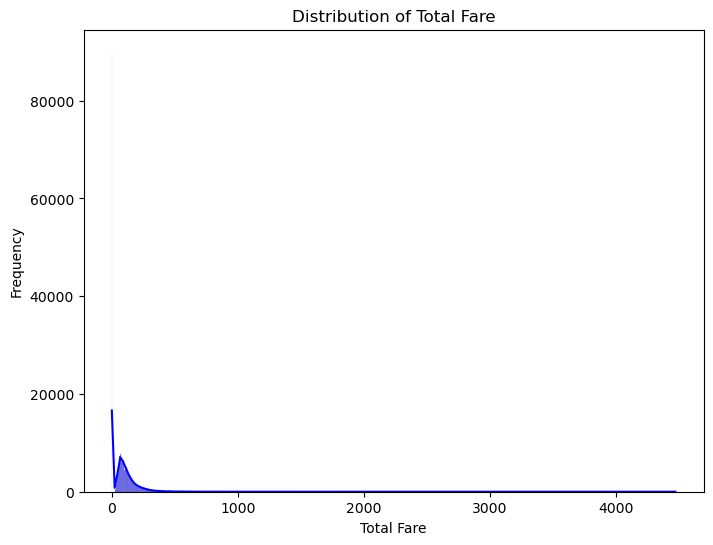

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(taxi_fare['total_fare'], kde=True, color='blue')
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.show()


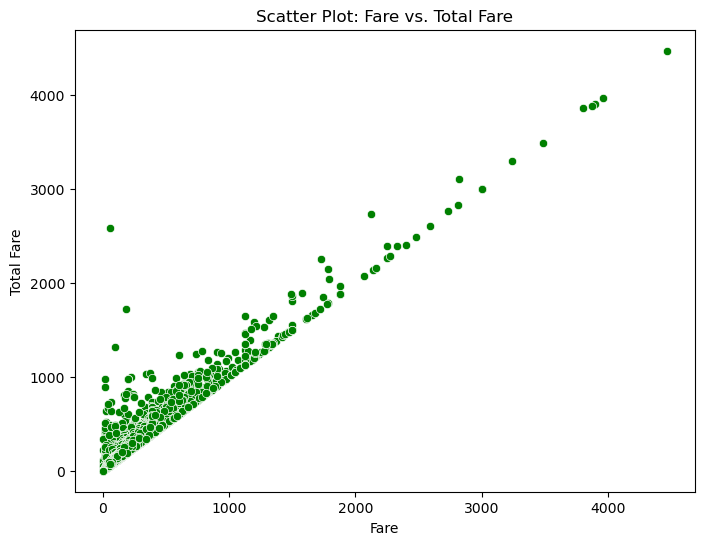

In [33]:
# Scatter plot for 'fare' vs. 'total_fare'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare', y='total_fare', data=taxi_fare, color='green')
plt.title('Scatter Plot: Fare vs. Total Fare')
plt.xlabel('Fare')
plt.ylabel('Total Fare')
plt.show()


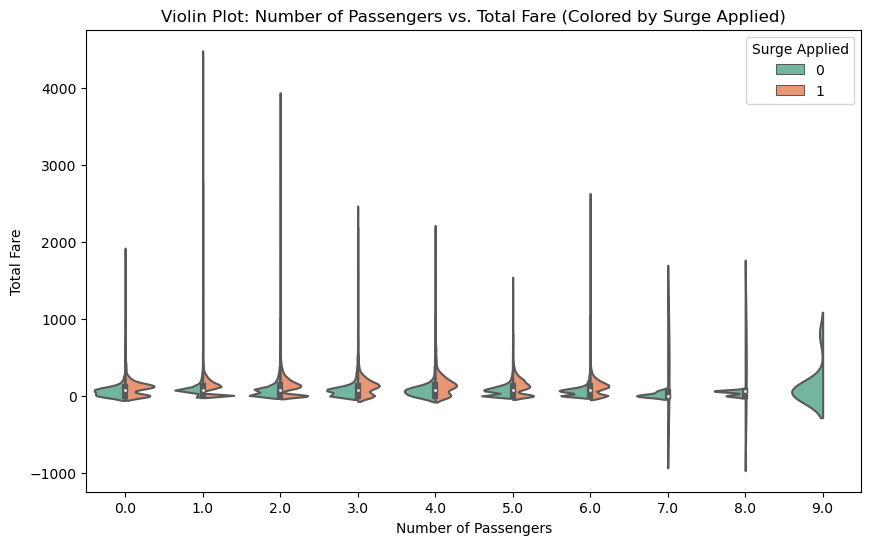

In [34]:
# Violin plot for 'num_of_passengers' vs. 'total_fare' with color by 'surge_applied'
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_of_passengers', y='total_fare', hue='surge_applied', data=taxi_fare, palette='Set2', split=True)
plt.title('Violin Plot: Number of Passengers vs. Total Fare (Colored by Surge Applied)')
plt.xlabel('Number of Passengers')
plt.ylabel('Total Fare')
plt.legend(title='Surge Applied', loc='upper right')
plt.show()

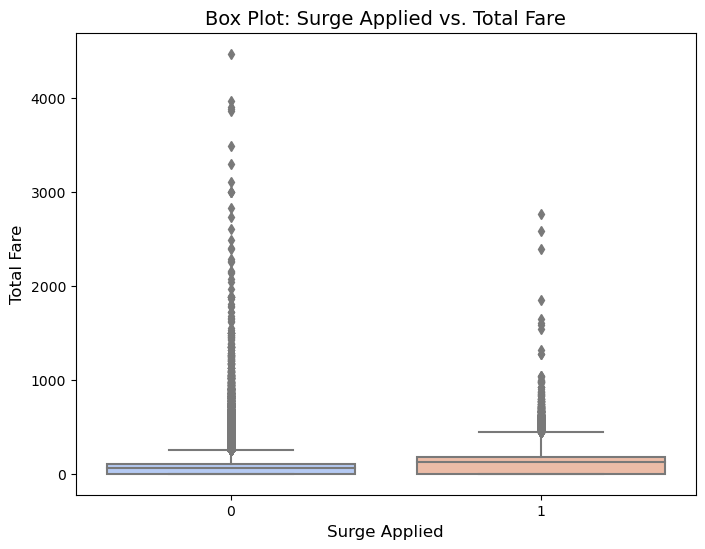

In [35]:
# Box plot for 'surge_applied' vs. 'total_fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='surge_applied', y='total_fare', data=taxi_fare, palette='coolwarm')
plt.title('Box Plot: Surge Applied vs. Total Fare', fontsize=14)
plt.xlabel('Surge Applied', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.show()

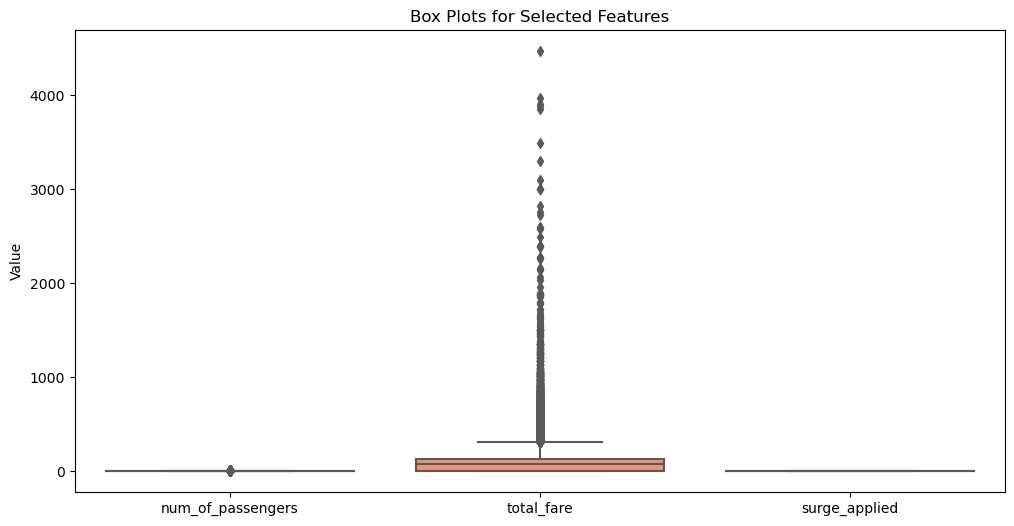

In [20]:
# Box plots for selected features
plt.figure(figsize=(12, 6))
sns.boxplot(data=taxi_fare[['num_of_passengers', 'total_fare', 'surge_applied']], palette='Set2')
plt.title('Box Plots for Selected Features')
plt.ylabel('Value')
plt.show()


# Building a Linear Regression  Model

In [36]:
model = LinearRegression()

In [37]:
# Training the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
print(y_pred)

[50.26453393 78.09325588 56.74611105 ... 95.63115401  3.91705919
 82.25425206]


# Evaluating Model's Performance

In [42]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Print MAE
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 9.65554018541052


In [43]:
# Make predictions on the test data
y_pred = model.predict(X_test)  

# Calculate the R-squared score
score = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared Score (Linear Regression): {score}")


R-squared Score (Linear Regression): 0.9775891202746683


In [44]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 231.25662544555715


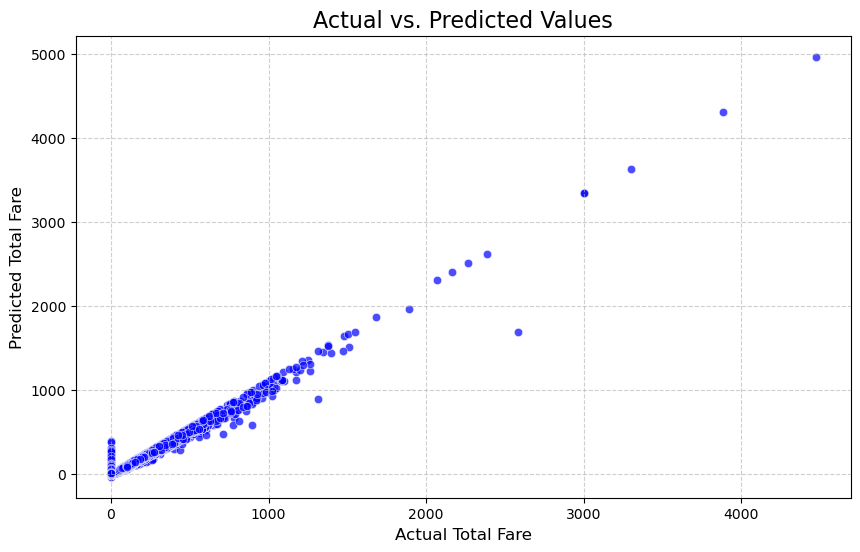

In [47]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Total Fare', fontsize=12)
plt.ylabel('Predicted Total Fare', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

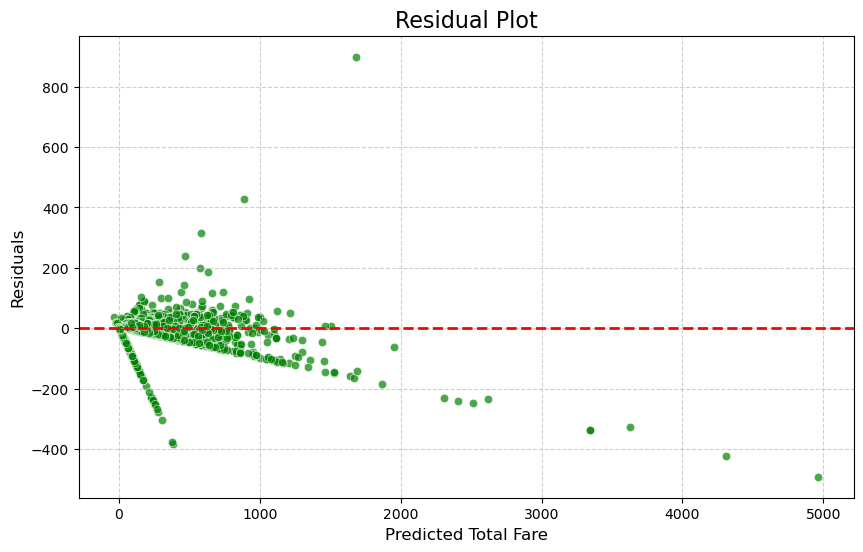

In [48]:
# Residual plot to visualize errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Total Fare', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


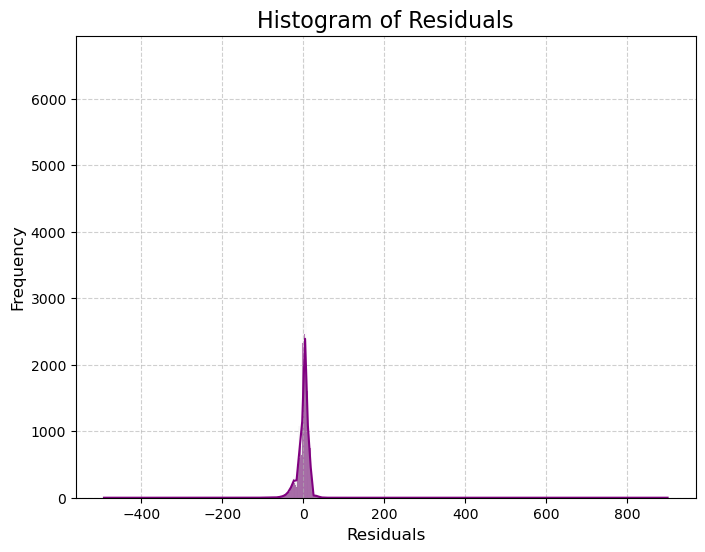

In [49]:
# Histogram of residuals to check for normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Making predictions using the Trained model

In [51]:
# Create a NumPy array for a single input sample
input_sample = np.array([[30, 3.5, 1, 15.0, 2.0, 1.0, 0]]) 

# Use the model to make a prediction for the input sample
prediction = model.predict(input_sample)

# Print the prediction
print("Predicted Total Fare:", prediction[0])


Predicted Total Fare: 13.849820808891927


# Saving the Model using pickle

In [60]:
import pickle

model_filename = r'C:\Users\Aashir\Desktop\DSA project\model'

# Use pickle to save the model to a file
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved as {model_filename}")


Model saved as C:\Users\Aashir\Desktop\DSA project\model
